<table>
    <tr><td align="right" style="color:#777777;background-color:#ffffff;font-size:12px;">
          Prepared by Berat Yenilen
    <tr><td align="right" style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;">
        This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros.
    </td></tr>
</table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Y}{ \mymatrix{cc}{0 & -i \\ i & 0}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $

# Simon's Algorithm 

In Simon's problem, we are given a function $f(x): \{0,1 \}^n \rightarrow \{0, 1\}^n$, that is defined as $f(x) = f(y)$ if and only if $ x = y\bigoplus s $, for some secret bitring s, where $y \bigoplus s$ denotes XOR operation. For example, $011 \bigoplus 101 = 110$. Our problem is to find s.

Classically, the worst case scenario occurs when $s=0^{n}$. In this case, you would need check $2^{n-1} +1 $ many inputs before being able to figure out what s is with certainty. So the classical algorithm has an exponential time complexity on the input size. 

However, by using Simon's algorithm we will achieve an exponential speed-up. Please quickly go over your lecture notes to remember Simon's algorithm.

Before we move on to writing down the code that implements the algorithm let us outline what we need to do:

- Initialze a quantum circuit with 2n qubits.
- Apply Hadamard gate to first n qubits.
- Apply our oracle.
- Measure the last n qubits.
- Apply Hadamard gate to the first n qubits.
- Measure the first n qubits.
- Repeat this procedure about O(n) times to get n linearly independent equations for s, then solve them.

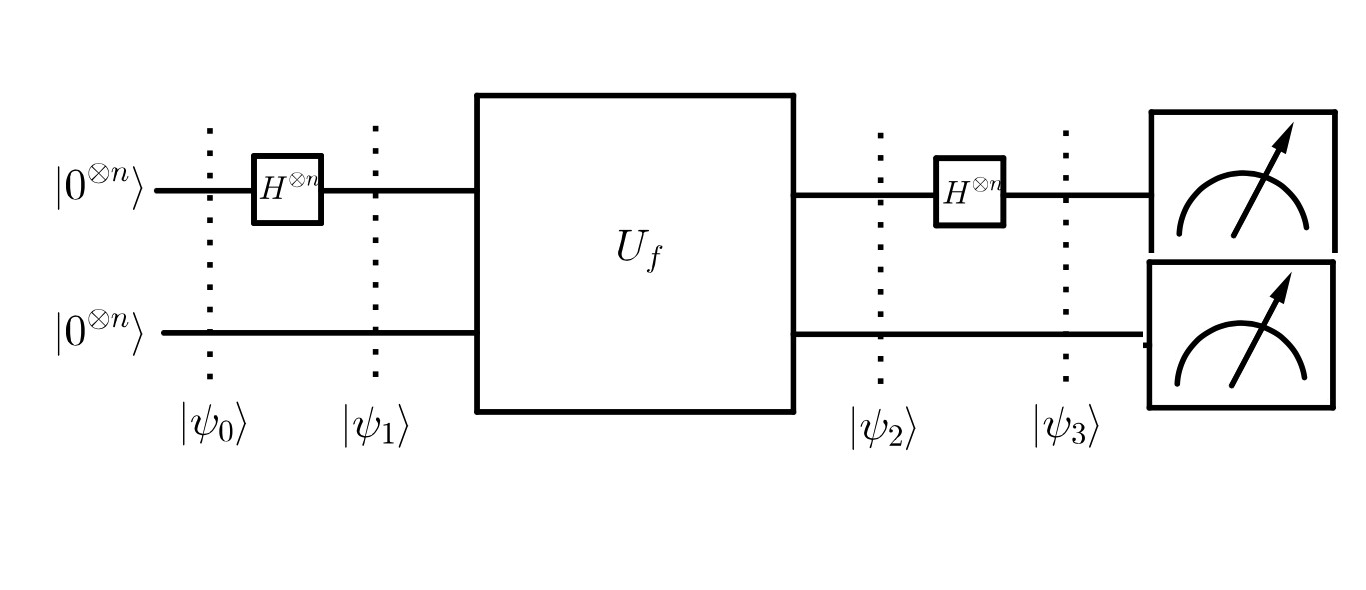

In [283]:
%run oracles.py

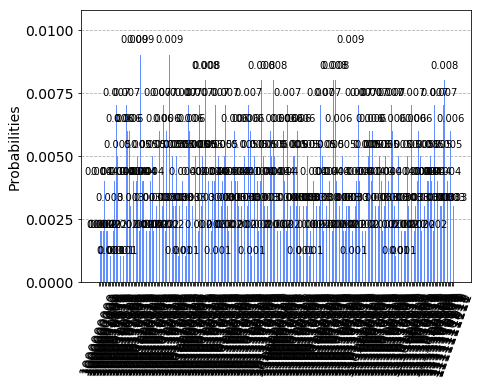

In [300]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

n = 5
# We need a total of 2n quantum and classical registers
#qreg = QuantumRegister(2*n, name='q')
#creg = ClassicalRegister(2*n, name='creg')
#qc = QuantumCircuit(qreg, creg)
qc = QuantumCircuit(2*n)

# Apply Hadamard gates to the first n qubits.
for i in range(n):
    qc.h(i)
qc.barrier()
    
# This is a more compact way of doing the same operation
#qc.h(range(n))
#qc.append(gate, list_of_qubits)

# Let us apply our oracle function simonOracle(qc, n). It will return the secret string produced. Don't peak!!
secret_string = simonOracle(qc, n)
qc.barrier()

# Apply Hadamard gates to the first n qubits.
qc.h(range(n))

# Finally, measure all qubits.
qc.measure_all()

qc.draw(output='mpl')

job = execute(qc, Aer.get_backend("qasm_simulator"), shots=1000)
result = job.result().get_counts(qc)

plot_histogram(result)

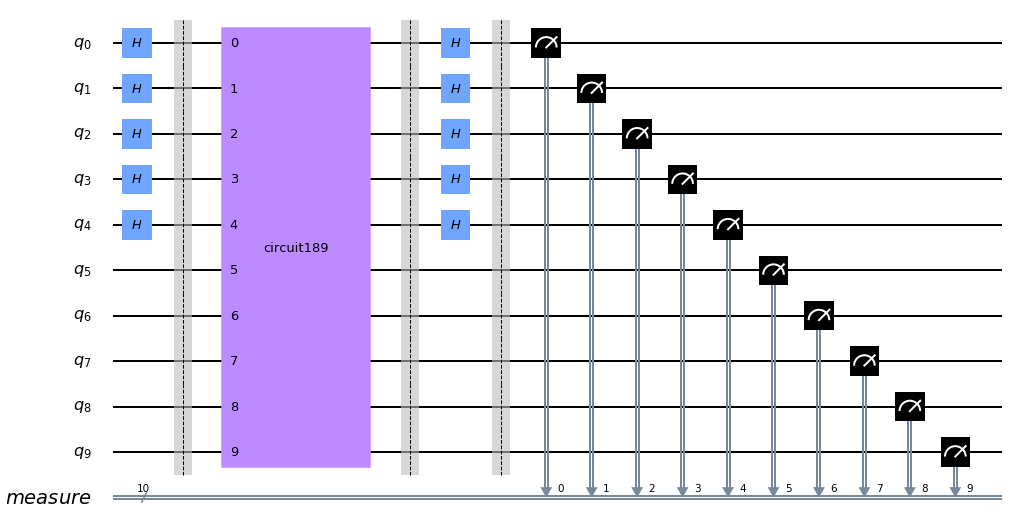

In [301]:
qc.draw(output='mpl')

This histogram however, gives us no information about the string s. Remember we need to get the results at the first n qubits, and we know that those bitstrings are orthogonal to s from our analysis. So we need to do the following:

- Reverse all the printed bitstrings.
- Get the first n of these bitstrings.

In [302]:
print(result)

{'1001100000': 6, '1010100000': 8, '1000110111': 4, '1110100100': 7, '1000001001': 4, '1010010011': 5, '1101001101': 4, '1000111010': 5, '1111010011': 2, '1111111010': 5, '1110100101': 7, '1101110011': 1, '1000111110': 9, '1110011010': 4, '1111110110': 3, '1010001000': 6, '1100011011': 3, '1100001100': 6, '1111000100': 6, '1110011011': 2, '1110110110': 2, '1011100000': 1, '1000111011': 2, '1100101001': 3, '1100110111': 3, '1000100001': 4, '1001011110': 7, '1010101001': 4, '1011011110': 7, '1011110011': 3, '1101011110': 6, '1101101101': 9, '1101110111': 4, '1110001000': 6, '1111110111': 4, '1110000101': 5, '1111100001': 2, '1100110011': 1, '1111100100': 7, '1001001000': 2, '1110000000': 7, '1100101100': 5, '1011001101': 3, '1010010110': 2, '1101100000': 2, '1111110010': 7, '1110010111': 5, '1011011011': 3, '1000101101': 3, '1110100001': 4, '1001010110': 7, '1000101001': 6, '1001000001': 5, '1001000101': 3, '1000100100': 1, '1001110010': 5, '1010110011': 5, '1100110010': 5, '1011101100':

In [303]:
orthogonal_set = []
for bitstring in result.keys():
    reversed_bitstring = bitstring[::-1]
    first_n_elements = reversed_bitstring[0:n]
    if not( first_n_elements in orthogonal_set):
        orthogonal_set.append( first_n_elements )

In [304]:
print(orthogonal_set)

['00000', '11101', '00100', '10010', '11001', '10110', '01011', '10100', '01111', '01101', '00010', '11011', '00110', '10000', '01001', '11111']


At this point we are finished. We have defined a function called $simonSolver(orthogonal\_set)$ which takes in a orthogonal set of bitstrings and returns the secret bitstring. 

In [305]:
secret_string_result = simonSolver(orthogonal_set)
print("Secret bitstring we found is:", secret_string_result)


Secret bitstring we found is: 01001


In [306]:
print("The secret bitstring was actually:", secret_string)

The secret bitstring was actually: 01001


# Oracle Function

Now, let us see what is the oracle function for this problem looks like. In the end we want to do the mapping $\ket{x}\ket{0} \rightarrow \ket{x} \ket{f(x)}$. To achieve this with a quantum circuit let's split this process into 3 parts.

1. $\ket{x}\ket{0} \rightarrow \ket{x} \ket{x}$. Copying the bitstring x to an empty bitstring 0 is easy, we'll just apply CNOTs.
2. $\ket{x} \ket{x} \rightarrow \ket{x} \ket{x \bigoplus s} $. For this part, we will apply an X-gate to each qubit $q_i$ for which $s[i] = 1$.
3. Finally, just to make our function a little more interesting, we will apply X gates to all the qubits in the second register. 

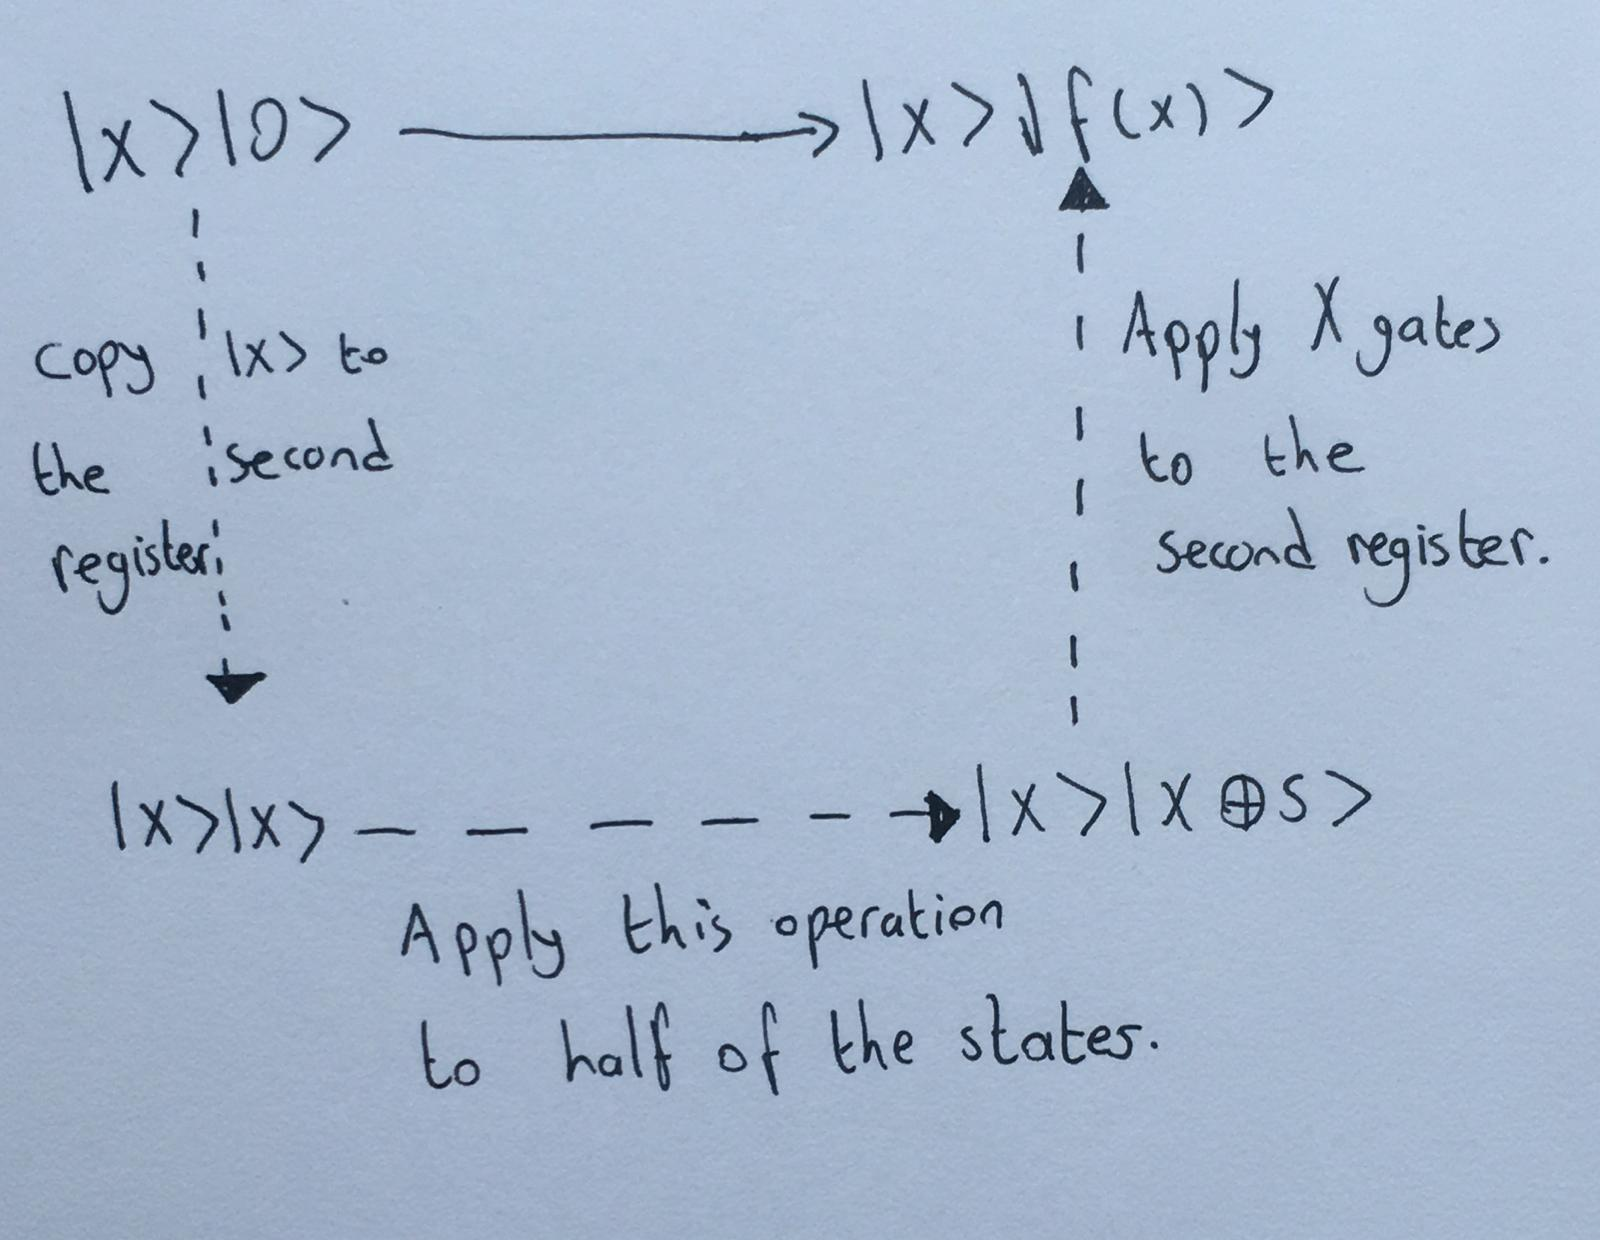

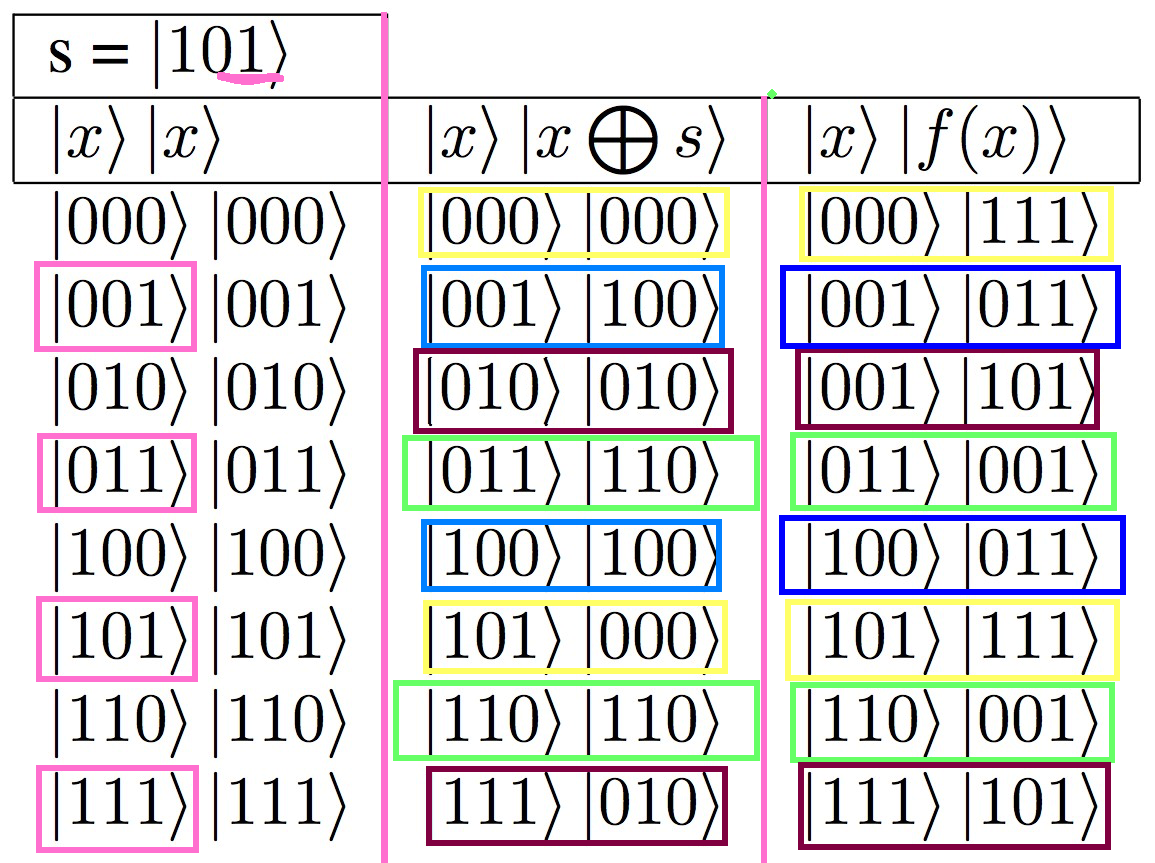

Let us now go over the code that we have defined in oracles.py. 

In [ ]:

def simonOracle(qc, n):
    # Let us first generate a random bit string s with length n
    s = ""
    for i in range(n):
        if np.random.randint(2) == 1:
            s += '1'
        else:
            s += '0'

    # Now that we have our bitstring let us initialze a quantum circuit.
    oracle_circuit = QuantumCircuit(2*n)

    # The first thing we do is to copy the contents of †he first register
    # to the second register. We can achieve this easily by CNOT gates, for each
    # qubit.
    for i in range(n):
        oracle_circuit.cx(i, n+i)

    # Now, let us find the set of indices i at which s[i]=1
    setOfIndices = []
    for i in range(n):
        if (s[i] == "1"):
            setOfIndices.append(i)

    # We also need the least significant index at which s[i]=1
    if (len(setOfIndices)):
        least_significant_index = setOfIndices[-1]

    # What we want to do is apply CNOTS where the control qubit is always the qubit 
    # at the least_index position of the first register, and we will go over all indices
    # at which s[i] = 1.
    for target in setOfIndices:
        oracle_circuit.cx(least_significant_index, (n+target))

    # Don't forget the second register begins at index n. So if you want to go to index 
    # target on the second register, you should index it with n+target.

    # Just to make our mapping function a little more interesting we will apply X gates to
    # all the qubits in the second register. 
    # The only time we should avoid doing this operation is when s=00...0 bitstring. 
    # When s is in that form, setOfIndices will be an empty list.
    if (len(setOfIndices)):
        for i in range(n):
            oracle_circuit.x(n+i)

    # Our oracle is finished, let us convert it to a gate and append it to qc.
    oracle_gate = oracle_circuit.to_gate()
    qc.append(oracle_gate, range(2*n))

    return s

# Suggestions
I strongly suggest you to go over the definition of the oracle. It is not an easy one. And if you have time, play with it and try to write down your version of a generalized oracle. For example, you can simply changes the gates we've applied at the end and produce another oracle. But the question is what types of gates can you apply at the last step and still have an oracle ? 

Also, if you want to obtain a different perspective you should check out Qiskit Texbook: https://qiskit.org/textbook/ch-algorithms/simon.html.
 
Just for those who are interested, below is the definition for $simonSolver(orthogonal\_set)$ function with comments next to them.

In [ ]:
def stringDotProduct(str1, str2):
    result = 0
    for i in range(len(str1)):
        if (str1[i] == '1' and str2[i] == '1'):
            result += 1
    return (result%2)


def simonSolver(orthogonal_set):
    # This is basically the same as saying you have less equations than unknowns.
    if len(orthogonal_set) < len(orthogonal_set[0]):
        print("You need more strings!!!!!!!!")
        return ""

    # We define n to be the length of the strings. 
    # We assume all of them to be of the same length.
    n = len(orthogonal_set[0])

    # This basically goes over all possible integer values from 0 all the way
    # up to 2**n-1, the biggest number you can represent with n bits. For each
    # value, it converts it to binary form, padding the beginning with 0s to 
    # make its length n.
    setOfAllPossibleBitStrings = [ format(b, '0'+str(n)+'b') for b in range(2**n) ]

    # Our algorithm is a brute-force one, because I couldn't think of an 
    # easier way to do it. Although this is inefficient, I trust you not to run 
    # the code with big values of n :) 
    # That being said, the algorithm just goes over all possible bitstrings and checks
    # whether that particular string is orthogonal to each bitstring in the orthogonal_set.
    # If it is, it equates that to the result.
    # One important thing to notice is 000..0 bitstring is always orthonogal to any set
    # of bitstrings, and since setOfAllPossibleBitStrings contains the bitstrings in increasing
    # order, we return the latest one as our result.
    result = ""
    for string in setOfAllPossibleBitStrings:
        orthogonal_counter = 0
        for orthoElement in orthogonal_set:
            if (stringDotProduct(string, orthoElement) == 0):
                orthogonal_counter += 1

        if (orthogonal_counter == len(orthogonal_set)):
            result = string
    return result